In [ ]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/Python/ORG03-24112017-25012023datedddd.csv') #reading the csv file


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.isnull().sum()

EventName                 0
StartDate                 0
EventType            245713
BookingReference          0
AttendeeReference         0
GroupSize                 0
IsLeadAttendee            0
AttendeeGrossCost         0
EventId                   0
BookingStatus             2
AttendeeType              0
TicketType           245988
StatusCreatedDate         2
ClientId                  3
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245988 entries, 0 to 245987
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventName          245988 non-null  object 
 1   StartDate          245988 non-null  object 
 2   EventType          275 non-null     object 
 3   BookingReference   245988 non-null  object 
 4   AttendeeReference  245988 non-null  object 
 5   GroupSize          245988 non-null  int64  
 6   IsLeadAttendee     245988 non-null  object 
 7   AttendeeGrossCost  245988 non-null  int64  
 8   EventId            245988 non-null  int64  
 9   BookingStatus      245986 non-null  object 
 10  AttendeeType       245988 non-null  object 
 11  TicketType         0 non-null       float64
 12  StatusCreatedDate  245986 non-null  object 
 13  ClientId           245985 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 26.3+ MB


In [ ]:
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId
0,Developing Reading and Writing Skills,28/11/2017 0:00,NaN,B462687,A514297,1,True,0,14983,Registered,Attendee,NaN,11/11/2017,153.0
1,Teaching Grammar: Classroom choices,13/12/2017 0:00,NaN,B462689,A514299,1,True,0,14960,Registered,Attendee,NaN,11/11/2017,153.0
2,Teaching Grammar: Classroom choices,13/12/2017 0:00,NaN,B467150,A519135,1,True,0,14960,Registered,Attendee,NaN,22/11/2017,153.0
3,Academic vocabulary: what do students need to ...,19/04/2018 0:00,NaN,B533234,A588469,1,True,0,15893,Registered,Attendee,NaN,11/04/2018,153.0
4,Researching the classroom,14/11/2018 0:00,NaN,B604614,A662691,1,True,0,17350,Registered,Attendee,NaN,15/10/2018,153.0


# Data Cleaning

In [ ]:
df.drop(axis=1, columns=['TicketType','EventType'], inplace=True)

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.fillna(method="bfill", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245986 entries, 0 to 245987
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventName          245986 non-null  object 
 1   StartDate          245986 non-null  object 
 2   BookingReference   245986 non-null  object 
 3   AttendeeReference  245986 non-null  object 
 4   GroupSize          245986 non-null  int64  
 5   IsLeadAttendee     245986 non-null  object 
 6   AttendeeGrossCost  245986 non-null  int64  
 7   EventId            245986 non-null  int64  
 8   BookingStatus      245986 non-null  object 
 9   AttendeeType       245986 non-null  object 
 10  StatusCreatedDate  245986 non-null  object 
 11  ClientId           245986 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 24.4+ MB


In [ ]:
df.nunique()

EventName               469
StartDate               361
BookingReference     244229
AttendeeReference    245986
GroupSize                11
IsLeadAttendee            6
AttendeeGrossCost         2
EventId                 488
BookingStatus             3
AttendeeType              5
StatusCreatedDate      1118
ClientId                  1
dtype: int64

In [ ]:

unique_cols= ['BookingStatus','IsLeadAttendee','AttendeeType','GroupSize','EventId'  ]

In [ ]:
for i in unique_cols:
  print(i, 'unique columns are' ,df[i].unique())

BookingStatus unique columns are ['Registered' 'Cancelled' '0']
IsLeadAttendee unique columns are [True False 'TRUE' 'FALSE' 'Registered' '0']
AttendeeType unique columns are ['Attendee' 'Free' '03/03/2020 15:24' '27/03/2020 17:38'
 'Day 1. 24th June 2022']
GroupSize unique columns are [ 1  0  2  3  4  5 12  7  6  8  9]
EventId unique columns are [14983 14960 15893 17350 17489 22366 15029 15761 17895 20051 16753 15541
 19196 19191 22443 22458 20050 22140 19609 19311 20567 16876 16092 17356
 16517 15852 22453 15502 22412 15506 12595 14824 14912 14948 14923 14973
 15005 15002 15006 15019 15065 15053 15149 15136 15137 15272 15244 15393
 15170 15129 15171 15466 15515 15557 15545 15556 15599 15592 15607 15558
 15442 15441 15653 15604 15668 15663 15673 15707 15735 15727 15764 15834
 15832 15795 15785 15755 15864 15876 15878 15923 15927 15925 15926 15983
 15992 16012 16013 16014 16015 16016 16017 16018 16019 16020 16021 15928
 15440 16052 16054 16059 16072 16060 16051 16058 16071 16085 16083 

In [ ]:
df.groupby('StartDate').sum().info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 01/01/2020 0:00 to 31/10/2022 0:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GroupSize          361 non-null    int64  
 1   AttendeeGrossCost  361 non-null    int64  
 2   EventId            361 non-null    int64  
 3   ClientId           361 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.1+ KB


In [ ]:
df.describe()

,GroupSize,AttendeeGrossCost,EventId,ClientId
count,245986.000000,245986.000000,245986.000000,245986.0
mean,1.018282,0.167875,18895.275373,153.0
std,0.231024,83.261125,2784.183562,0.0
min,0.000000,0.000000,0.000000,153.0
25%,1.000000,0.000000,16289.000000,153.0
50%,1.000000,0.000000,19239.000000,153.0
75%,1.000000,0.000000,21288.000000,153.0
max,12.000000,41295.000000,27560.000000,153.0


In [ ]:
df.query('IsLeadAttendee != IsLeadAttendee')

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,StatusCreatedDate,ClientId


# Preprocessing

In [ ]:
df2 = df.copy()

In [ ]:

unique_column= ['BookingStatus','AttendeeType'  ]

In [ ]:
# EventType
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245986 entries, 0 to 245987
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventName          245986 non-null  object 
 1   StartDate          245986 non-null  object 
 2   BookingReference   245986 non-null  object 
 3   AttendeeReference  245986 non-null  object 
 4   GroupSize          245986 non-null  int64  
 5   IsLeadAttendee     245986 non-null  object 
 6   AttendeeGrossCost  245986 non-null  int64  
 7   EventId            245986 non-null  int64  
 8   BookingStatus      245986 non-null  object 
 9   AttendeeType       245986 non-null  object 
 10  StatusCreatedDate  245986 non-null  object 
 11  ClientId           245986 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 24.4+ MB


# EDA

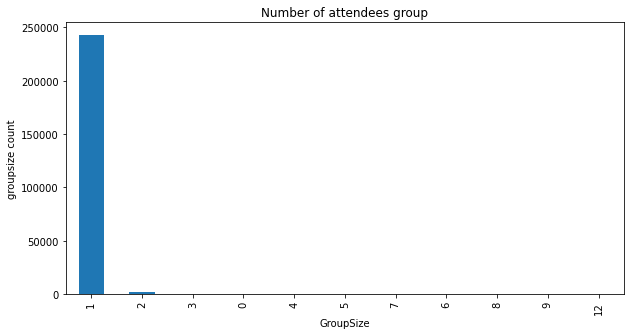

In [ ]:
df.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

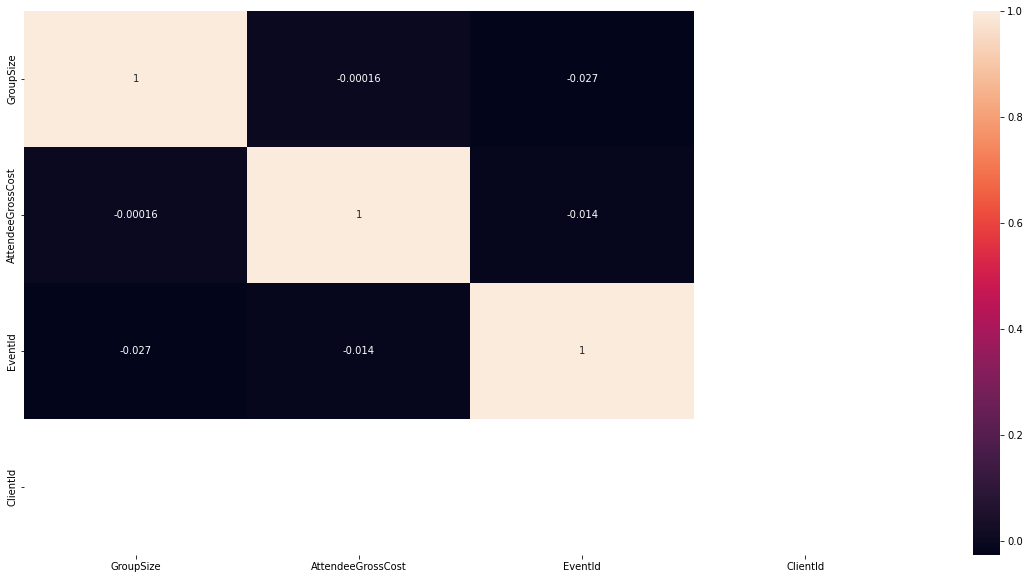

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot = True)

In [ ]:
df2['StartDate'] = pd.to_datetime(df2['StartDate'], infer_datetime_format=True)

In [ ]:
# date1 = pd.to_datetime(df2['StatusCreatedDate'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
# date2 = pd.to_datetime(df2['StatusCreatedDate'],format='%Y-%m-%d', errors='coerce')

# df2['newStatusCreatedDate'] = date1.combine_first(date2)
# dayfirst=True
# df2.query('')
df2['StatusCreatedDate']

0         11/11/2017
1         11/11/2017
2         22/11/2017
3         11/04/2018
4         15/10/2018
             ...    
245983    11/01/2023
245984    11/01/2023
245985    11/01/2023
245986    13/01/2023
245987    15/01/2023
Name: StatusCreatedDate, Length: 245986, dtype: object

In [ ]:

df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], infer_datetime_format=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245986 entries, 0 to 245987
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EventName          245986 non-null  object        
 1   StartDate          245986 non-null  datetime64[ns]
 2   BookingReference   245986 non-null  object        
 3   AttendeeReference  245986 non-null  object        
 4   GroupSize          245986 non-null  int64         
 5   IsLeadAttendee     245986 non-null  object        
 6   AttendeeGrossCost  245986 non-null  int64         
 7   EventId            245986 non-null  int64         
 8   BookingStatus      245986 non-null  object        
 9   AttendeeType       245986 non-null  object        
 10  StatusCreatedDate  245986 non-null  datetime64[ns]
 11  ClientId           245986 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 24.4+ MB


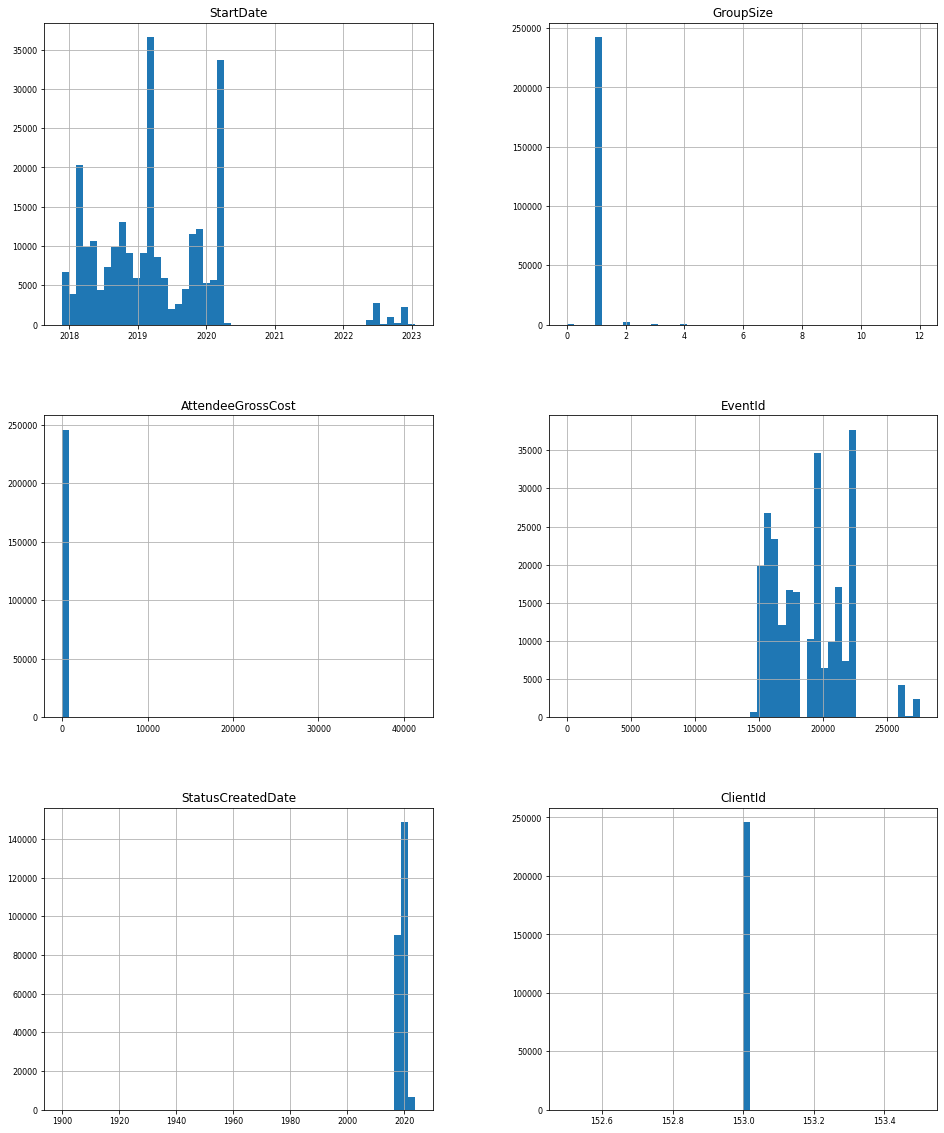

In [ ]:
df2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245986 entries, 0 to 245987
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EventName          245986 non-null  object        
 1   StartDate          245986 non-null  datetime64[ns]
 2   BookingReference   245986 non-null  object        
 3   AttendeeReference  245986 non-null  object        
 4   GroupSize          245986 non-null  int64         
 5   IsLeadAttendee     245986 non-null  object        
 6   AttendeeGrossCost  245986 non-null  int64         
 7   EventId            245986 non-null  int64         
 8   BookingStatus      245986 non-null  object        
 9   AttendeeType       245986 non-null  object        
 10  StatusCreatedDate  245986 non-null  datetime64[ns]
 11  ClientId           245986 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 24.4+ MB


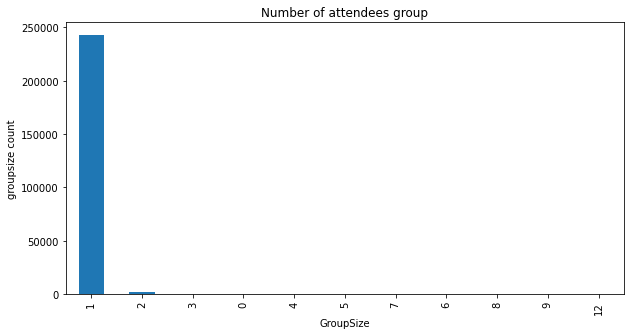

In [ ]:
df2.GroupSize.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of attendees group")
plt.ylabel('groupsize count')
plt.xlabel('GroupSize');

In [ ]:
df2.head()

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,StatusCreatedDate,ClientId
0,Developing Reading and Writing Skills,2017-11-28,B462687,A514297,1,True,0,14983,Registered,Attendee,2017-11-11,153.0
1,Teaching Grammar: Classroom choices,2017-12-13,B462689,A514299,1,True,0,14960,Registered,Attendee,2017-11-11,153.0
2,Teaching Grammar: Classroom choices,2017-12-13,B467150,A519135,1,True,0,14960,Registered,Attendee,2017-11-22,153.0
3,Academic vocabulary: what do students need to ...,2018-04-19,B533234,A588469,1,True,0,15893,Registered,Attendee,2018-11-04,153.0
4,Researching the classroom,2018-11-14,B604614,A662691,1,True,0,17350,Registered,Attendee,2018-10-15,153.0


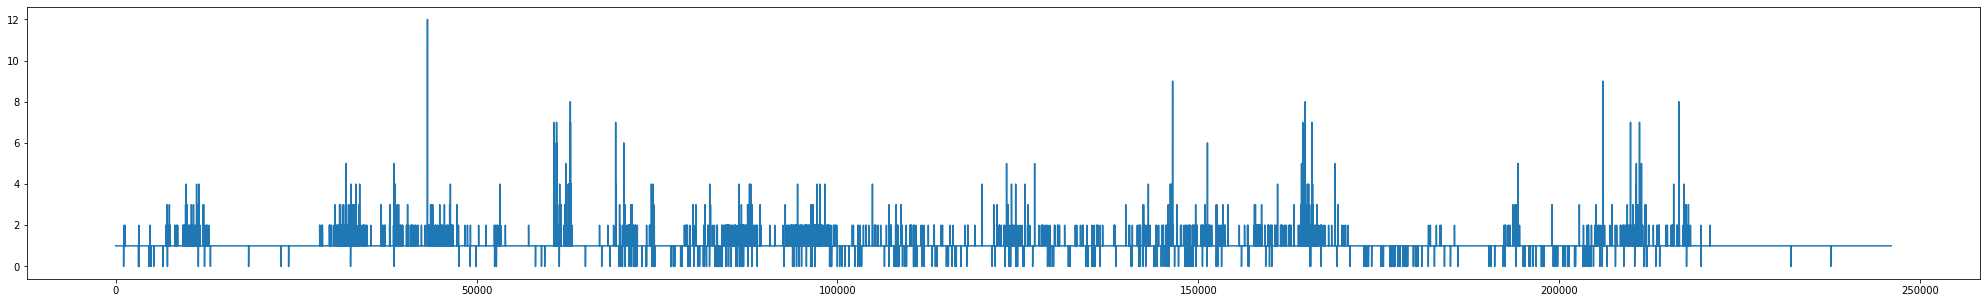

In [ ]:
plt.figure(figsize=(35,5))
df2['GroupSize'].plot()

In [ ]:
df2['cum_booking'] = df2['GroupSize'].cumsum(axis=0)

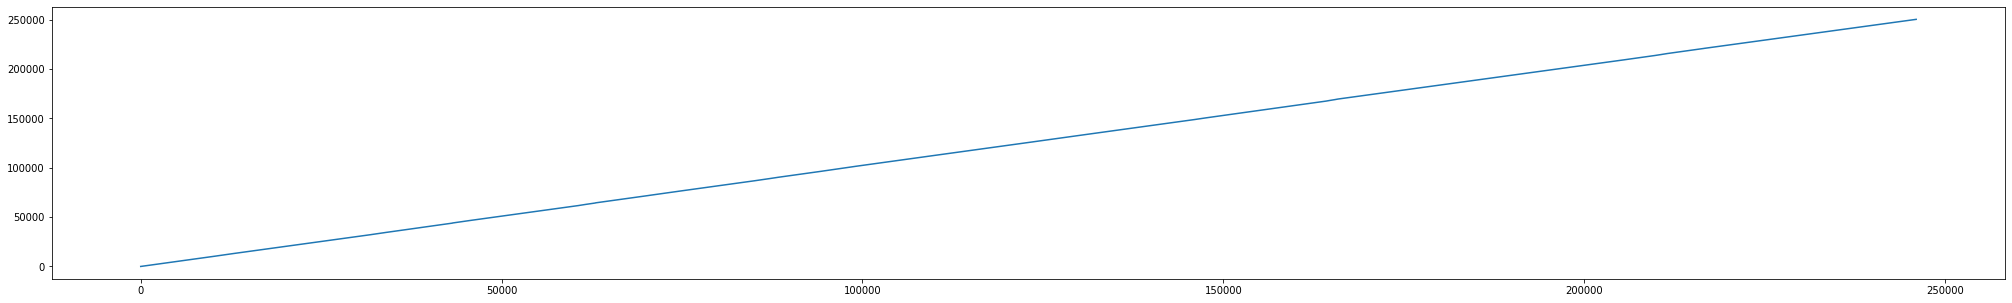

In [ ]:
plt.figure(figsize=(35,5))
df2['cum_booking'].plot()

In [ ]:
dfs = df2.copy()

## Feature Engineering

>> includes season column created

In [ ]:
_condition_winter = (df2.StartDate.dt.month>=1)&(df2.StartDate.dt.month<=3)
_condtion_spring = (df2.StartDate.dt.month>=4)&(df2.StartDate.dt.month<=6)
_condition_summer = (df2.StartDate.dt.month>=7)&(df2.StartDate.dt.month<=9)
_condition_autumn = (df2.StartDate.dt.month>=10)&(df2.StartDate.dt.month<=12)
  # return data

df2['Season'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

In [ ]:
def create_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['hour'] = dfs.index.hour
    dfs['dayofweek'] = dfs.index.dayofweek
    dfs['quarter'] = dfs.index.quarter
    dfs['month'] = dfs.index.month
    dfs['year'] = dfs.index.year
    dfs['dayofyear'] = dfs.index.dayofyear
    dfs['dayofmonth'] = dfs.index.day
    dfs['weekofyear'] = dfs.index.isocalendar().week
    return dfs

df2 = create_features(df2)

In [ ]:
df2['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df2['StatusCreatedDate'])

In [ ]:
df2['days_to_event'] = df2['time_to_event']/ np.timedelta64(1, 'D') 

In [ ]:
df2.columns

Index(['EventName', 'StartDate', 'BookingReference', 'AttendeeReference',
       'GroupSize', 'IsLeadAttendee', 'AttendeeGrossCost', 'EventId',
       'BookingStatus', 'AttendeeType', 'StatusCreatedDate', 'ClientId',
       'cum_booking', 'time_to_event', 'days_to_event'],
      dtype='object')

### Startdate Grouping

In [ ]:
dfsort = df2.sort_values('StartDate')


In [ ]:
dfsort

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,StatusCreatedDate,ClientId,cum_booking,time_to_event,days_to_event
8056,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B454680,A505771,1,True,0,14912,Registered,Attendee,2017-10-31,153.0,8099,25 days 00:00:00,25.000000
8594,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B457889,A509311,1,True,0,14912,Registered,Attendee,2017-07-11,153.0,8647,137 days 00:00:00,137.000000
8593,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B457885,A509305,1,True,0,14912,Registered,Attendee,2017-07-11,153.0,8646,137 days 00:00:00,137.000000
8592,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B457883,A509303,1,True,0,14912,Registered,Attendee,2017-07-11,153.0,8645,137 days 00:00:00,137.000000
8591,Mixed Ability Classes: How to cater for our st...,2017-11-25 00:00:00,B457877,A509297,1,True,0,14948,Registered,Attendee,2017-07-11,153.0,8644,137 days 00:00:00,137.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245979,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1138171,A1211131,1,TRUE,0,27368,Registered,Attendee,2022-12-20,153.0,250475,28 days 14:30:00,28.604167
245980,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1138188,A1211148,1,TRUE,0,27368,Registered,Attendee,2022-12-20,153.0,250476,28 days 14:30:00,28.604167
245981,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1138318,A1211282,1,TRUE,0,27368,Registered,Attendee,2022-12-21,153.0,250477,27 days 14:30:00,27.604167
245982,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1140634,A1213599,1,TRUE,0,27368,Registered,Attendee,2023-10-01,153.0,250478,-257 days +14:30:00,-256.395833


In [ ]:
dfsort0 = dfsort.groupby('StartDate')[['days_to_event']].nunique()


,days_to_event
StartDate,
2017-11-25 00:00:00,26
2017-11-27 00:00:00,51
2017-11-28 00:00:00,31
2017-12-05 00:00:00,12
2017-12-07 00:00:00,13
...,...
2022-12-09 00:00:00,8
2022-12-15 15:00:00,4
2023-01-03 00:00:00,1


In [ ]:
dfsort1 = dfsort.groupby('StartDate')[['EventId']].nunique()
dfsort1

,EventId
StartDate,
2017-11-25 00:00:00,3
2017-11-27 00:00:00,1
2017-11-28 00:00:00,2
2017-12-05 00:00:00,1
2017-12-07 00:00:00,1
...,...
2022-12-09 00:00:00,1
2022-12-15 15:00:00,1
2023-01-03 00:00:00,1


In [ ]:
dfsort2 = dfsort.groupby('StartDate')[['GroupSize']].sum()
dfsort2
dfsort2['avg_grp_size'] = dfsort2['GroupSize']/dfsort1['EventId'].values[0,:]

,GroupSize
StartDate,
2017-11-25 00:00:00,786
2017-11-27 00:00:00,813
2017-11-28 00:00:00,1652
2017-12-05 00:00:00,64
2017-12-07 00:00:00,1005
...,...
2022-12-09 00:00:00,1787
2022-12-15 15:00:00,13
2023-01-03 00:00:00,2


In [ ]:
dfsort2['avg_grp_size'] = dfsort2['GroupSize'].div(dfsort1['EventId'])
dfsort2


,GroupSize,avg_grp_size
StartDate,,
2017-11-25 00:00:00,786,262.0
2017-11-27 00:00:00,813,813.0
2017-11-28 00:00:00,1652,826.0
2017-12-05 00:00:00,64,64.0
2017-12-07 00:00:00,1005,1005.0
...,...,...
2022-12-09 00:00:00,1787,1787.0
2022-12-15 15:00:00,13,13.0
2023-01-03 00:00:00,2,2.0


In [ ]:
def create_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['hour'] = dfs.index.hour
    dfs['dayofweek'] = dfs.index.dayofweek
    dfs['quarter'] = dfs.index.quarter
    dfs['month'] = dfs.index.month
    dfs['year'] = dfs.index.year
    dfs['dayofyear'] = dfs.index.dayofyear
    dfs['dayofmonth'] = dfs.index.day
    dfs['weekofyear'] = dfs.index.week
    return dfs

dfsort2 = create_features(dfsort2)

<ipython-input-160-c772f5353126>:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dfs['weekofyear'] = dfs.index.week


In [ ]:
_condition_winter = (dfsort2.index.month>=1)&(dfsort2.index.month<=3)
_condtion_spring = (dfsort2.index.month>=4)&(dfsort2.index.month<=6)
_condition_summer = (dfsort2.index.month>=7)&(dfsort2.index.month<=9)
_condition_autumn = (dfsort2.index.month>=10)&(dfsort2.index.month<=12)
  # return data

dfsort2['Season'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

In [ ]:
dfsort2

,GroupSize,avg_grp_size,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Season
StartDate,,,,,,,,,,,
2017-11-25 00:00:00,786,262.0,0,5,4,11,2017,329,25,47,0
2017-11-27 00:00:00,813,813.0,0,0,4,11,2017,331,27,48,0
2017-11-28 00:00:00,1652,826.0,0,1,4,11,2017,332,28,48,0
2017-12-05 00:00:00,64,64.0,0,1,4,12,2017,339,5,49,0
2017-12-07 00:00:00,1005,1005.0,0,3,4,12,2017,341,7,49,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09 00:00:00,1787,1787.0,0,4,4,12,2022,343,9,49,0
2022-12-15 15:00:00,13,13.0,15,3,4,12,2022,349,15,50,0
2023-01-03 00:00:00,2,2.0,0,1,1,1,2023,3,3,1,3


In [ ]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
unique_column = ['Season']
for i in unique_column:
  dfsort2[i] = encode.fit_transform(dfsort2[i])
dfsort2.head()

,GroupSize,avg_grp_size,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Season
StartDate,,,,,,,,,,,
2017-11-25,786,262.0,0,5,4,11,2017,329,25,47,0
2017-11-27,813,813.0,0,0,4,11,2017,331,27,48,0
2017-11-28,1652,826.0,0,1,4,11,2017,332,28,48,0
2017-12-05,64,64.0,0,1,4,12,2017,339,5,49,0
2017-12-07,1005,1005.0,0,3,4,12,2017,341,7,49,0


### Grouping by statuscreateddate

In [ ]:
df2.columns

Index(['EventName', 'StartDate', 'BookingReference', 'AttendeeReference',
       'GroupSize', 'IsLeadAttendee', 'AttendeeGrossCost', 'EventId',
       'BookingStatus', 'AttendeeType', 'StatusCreatedDate', 'ClientId',
       'cum_booking', 'time_to_event', 'days_to_event', 'Season'],
      dtype='object')

In [ ]:
dfstart = df2.sort_values('StatusCreatedDate')

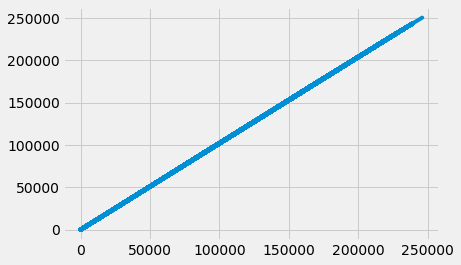

In [ ]:
dfstart['cum_booking'].plot()

In [ ]:
dfstart.set_index('StatusCreatedDate', inplace=True)

In [ ]:
dfstart

,EventName,StartDate,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,ClientId,cum_booking,time_to_event,days_to_event,Season
StatusCreatedDate,,,,,,,,,,,,,,,
1900-01-06,Oxford National Conference 2019,2019-03-18 00:00:00,B692243,A754504,1,Registered,41295,0,0,Free,153.0,145369,43535 days 00:00:00,43535.000000,Winter
2017-01-11,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B455657,A506878,1,True,0,14912,Registered,Attendee,153.0,8248,318 days 00:00:00,318.000000,Autumn
2017-01-11,Semináre pre učiteľov 1. a 2. stupňa ZŠ,2017-11-27 00:00:00,B455647,A506865,1,True,0,14824,Registered,Attendee,153.0,8247,320 days 00:00:00,320.000000,Autumn
2017-01-11,Reading is all around - little tricks to help ...,2017-11-25 00:00:00,B455634,A506848,1,True,0,14912,Registered,Attendee,153.0,8246,318 days 00:00:00,318.000000,Autumn
2017-01-11,Semináre pre učiteľov 1. a 2. stupňa ZŠ,2017-11-27 00:00:00,B455620,A506833,2,True,0,14824,Registered,Attendee,153.0,8242,320 days 00:00:00,320.000000,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1142482,A1215484,1,TRUE,0,27368,Registered,Attendee,153.0,250483,2 days 14:30:00,2.604167,Winter
2023-10-01,GLOBAL SKILLS: CREATING EMPOWERED 21st CENTURY...,2023-01-17 14:30:00,B1140634,A1213599,1,TRUE,0,27368,Registered,Attendee,153.0,250478,-257 days +14:30:00,-256.395833,Winter
2023-11-01,Practice Event 1 Aleksandra Nagiewicz,2023-01-13 10:00:00,B1140856,A1213851,1,TRUE,0,27545,Registered,Attendee,153.0,250479,-292 days +10:00:00,-291.583333,Winter


In [ ]:
dfPred = dfstart.resample('w').sum()
dfPred

,GroupSize,AttendeeGrossCost,EventId,ClientId,cum_booking,days_to_event
StatusCreatedDate,,,,,,
1900-01-07,1,41295,0,153.0,145369,43535.000000
1900-01-14,0,0,0,0.0,0,0.000000
1900-01-21,0,0,0,0.0,0,0.000000
1900-01-28,0,0,0,0.0,0,0.000000
1900-02-04,0,0,0,0.0,0,0.000000
...,...,...,...,...,...,...
2023-10-08,0,0,0,0.0,0,0.000000
2023-10-15,0,0,0,0.0,0,0.000000
2023-10-22,0,0,0,0.0,0,0.000000


In [ ]:
# dfPred.drop(dfPred.loc['1900-01-07'], axis='index' )

In [ ]:
dfPred2 = dfstart.resample('w')[['EventId']].nunique()
dfPred2

,EventId
StatusCreatedDate,
1900-01-07,1
1900-01-14,0
1900-01-21,0
1900-01-28,0
1900-02-04,0
...,...
2023-10-08,0
2023-10-15,0
2023-10-22,0


In [ ]:
dfPred2['avg_grp_size'] = dfPred['GroupSize'].div(dfPred2['EventId'])
dfPred2


,EventId,avg_grp_size
StatusCreatedDate,,
1900-01-07,1,1.0
1900-01-14,0,NaN
1900-01-21,0,NaN
1900-01-28,0,NaN
1900-02-04,0,NaN
...,...,...
2023-10-08,0,NaN
2023-10-15,0,NaN
2023-10-22,0,NaN


In [ ]:
dfPred2['avg_days_to_event'] = dfPred['days_to_event'].div(dfPred2['EventId'])
dfPred2

,EventId,avg_grp_size,avg_days_to_event
StatusCreatedDate,,,
1900-01-07,1,1.0,43535.000000
1900-01-14,0,NaN,NaN
1900-01-21,0,NaN,NaN
1900-01-28,0,NaN,NaN
1900-02-04,0,NaN,NaN
...,...,...,...
2023-10-08,0,NaN,NaN
2023-10-15,0,NaN,NaN
2023-10-22,0,NaN,NaN


In [ ]:
dfPred2.fillna(0, inplace=True)

In [ ]:
dfPred2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6462 entries, 1900-01-07 to 2023-11-05
Freq: W-SUN
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventId            6462 non-null   int64  
 1   avg_grp_size       6462 non-null   float64
 2   avg_days_to_event  6462 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 201.9 KB


In [ ]:
dfPred2.describe()

,EventId,avg_grp_size
count,6462.000000,203.000000
mean,0.717889,63.312656
std,5.577870,99.961576
min,0.000000,1.000000
25%,0.000000,19.465795
50%,0.000000,36.794118
75%,0.000000,74.545455
max,77.000000,961.000000


# ARIMA

In [ ]:
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfs['GroupSize'], test_size=.3, shuffle=False)

                               SARIMAX Results                                
Dep. Variable:              GroupSize   No. Observations:               172190
Model:                 ARIMA(2, 0, 1)   Log Likelihood               65691.946
Date:                Tue, 21 Feb 2023   AIC                        -131373.892
Time:                        21:29:45   BIC                        -131323.610
Sample:                             0   HQIC                       -131358.996
                             - 172190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0226      0.002    517.540      0.000       1.019       1.026
ar.L1          0.2127      0.003     66.990      0.000       0.207       0.219
ar.L2          0.3605      0.002    147.684      0.0

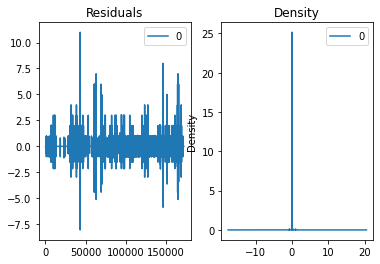

In [ ]:
#Fitting model
from statsmodels.tsa.arima.model import ARIMA
# 2,1,3 ARIMA Model
model = ARIMA(train, order=(2,0,1)) ### TEST q=1
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


In [ ]:
start = len(train)

end = len(train)+len(test)-1

pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)
print(train)
pred.index=dfs.index[start:end+1]



172190    1.006034
172191    1.010918
172192    1.014132
172193    1.016576
172194    1.018255
            ...   
245981    1.022575
245982    1.022575
245983    1.022575
245984    1.022575
245985    1.022575
Name: predicted_mean, Length: 73796, dtype: float64
0         1
1         1
2         1
3         1
4         1
         ..
172185    1
172186    1
172187    1
172188    1
172189    1
Name: GroupSize, Length: 172190, dtype: int64


In [ ]:
print(pred)

172190    1.006034
172191    1.010918
172192    1.014132
172193    1.016576
172194    1.018255
            ...   
245983    1.022575
245984    1.022575
245985    1.022575
245986    1.022575
245987    1.022575
Name: predicted_mean, Length: 73796, dtype: float64


In [ ]:
pred.index=dfs.index[start:end+1]

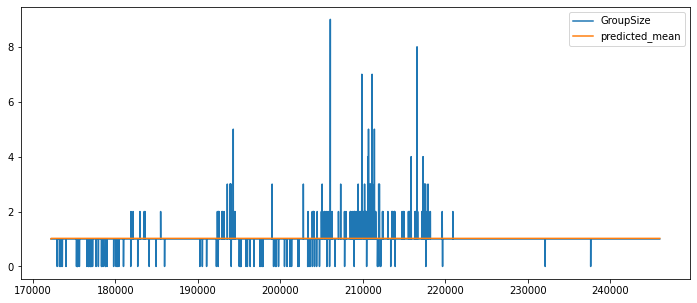

In [ ]:
test.plot(legend=True, figsize=(12,5))
pred.plot(legend=True, figsize=(12,5))



In [ ]:
# pd.concat([dfs['GroupSize'],pred], axis=1).plot()
from sklearn.metrics import mean_absolute_error,mean_squared_error
rf_mea = mean_absolute_error(test, pred)
print("MAE: ", rf_mea)

MAE:  0.03327483682791722


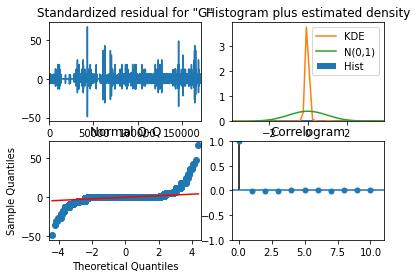

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_fit.plot_diagnostics()

plt.show()

In [ ]:
dfPred = df2.set_index('StatusCreatedDate')
dfPred = dfPred.resample('w').sum()
dfPred


,GroupSize,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,ClientId,cum_booking
StatusCreatedDate,,,,,,,
1900-01-07,1,41295,0,0,4,153.0,145369
1900-01-14,0,0,0,0,0,0.0,0
1900-01-21,0,0,0,0,0,0.0,0
1900-01-28,0,0,0,0,0,0.0,0
1900-02-04,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...
2023-10-08,0,0,0,0,0,0.0,0
2023-10-15,0,0,0,0,0,0.0,0
2023-10-22,0,0,0,0,0,0.0,0


## checking for Seasonality

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# ADF Test on each column
for name, column in dfPred.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GroupSize" 
    -----------------------------------------------
ADF Statistic: -5.213005
p-value: 0.000008
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary




/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


    Augmented Dickey-Fuller Test on "AttendeeGrossCost" 
    -----------------------------------------------
ADF Statistic: -16203459788331747901440000.000000
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "EventId" 
    -----------------------------------------------
ADF Statistic: -5.490919
p-value: 0.000002
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "BookingStatus" 
    -----------------------------------------------
ADF Statistic: -5.221689
p-value: 0.000008
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "AttendeeType" 
    -----------------------------------------------
ADF Statistic: -5.220774
p-value: 0.000008
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "ClientId" 
    -----------------------------------------------
ADF Statistic: -5.

### weekly arima

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfPred['GroupSize'], test_size=.3, shuffle=False)

# Prediction using Xgboost

---



---



### Prediction for tickets sold given an event start date




In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dfsort2, test_size=.3, shuffle=False)

In [ ]:
dfsort2.columns

Index(['GroupSize', 'avg_grp_size', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'Season'],
      dtype='object')

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = [ 'hour', 'dayofweek', 'quarter', 'month','year', 'dayofyear', 'dayofmonth', 'Season']
TARGET = 'avg_grp_size'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

<ipython-input-160-c772f5353126>:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dfs['weekofyear'] = dfs.index.week


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=900,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[14:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:919.987	validation_1-rmse:1049.03
[100]	validation_0-rmse:710.992	validation_1-rmse:883.014
[200]	validation_0-rmse:646.596	validation_1-rmse:848.175
[300]	validation_0-rmse:612.498	validation_1-rmse:831.55
[400]	validation_0-rmse:589.659	validation_1-rmse:827.766
[500]	validation_0-rmse:573.01	validation_1-rmse:829.697
[600]	validation_0-rmse:557.693	validation_1-rmse:831.505
[700]	validation_0-rmse:540.291	validation_1-rmse:833.586
[800]	validation_0-rmse:524.826	validation_1-rmse:836.329
[899]	validation_0-rmse:510.941	validation_1-rmse:841.08


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=900)

In [ ]:
dfsort2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2017-11-25 00:00:00 to 2023-01-17 14:30:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GroupSize     361 non-null    int64  
 1   avg_grp_size  361 non-null    float64
 2   hour          361 non-null    int64  
 3   dayofweek     361 non-null    int64  
 4   quarter       361 non-null    int64  
 5   month         361 non-null    int64  
 6   year          361 non-null    int64  
 7   dayofyear     361 non-null    int64  
 8   dayofmonth    361 non-null    int64  
 9   weekofyear    361 non-null    int64  
 10  Season        361 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 41.9 KB


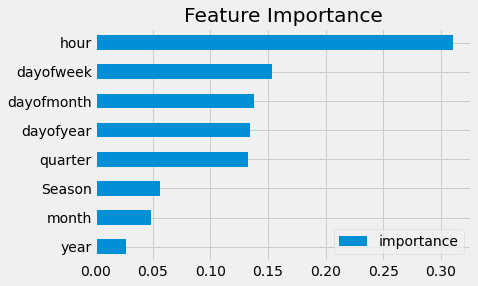

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_, index= reg.get_booster().feature_names,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

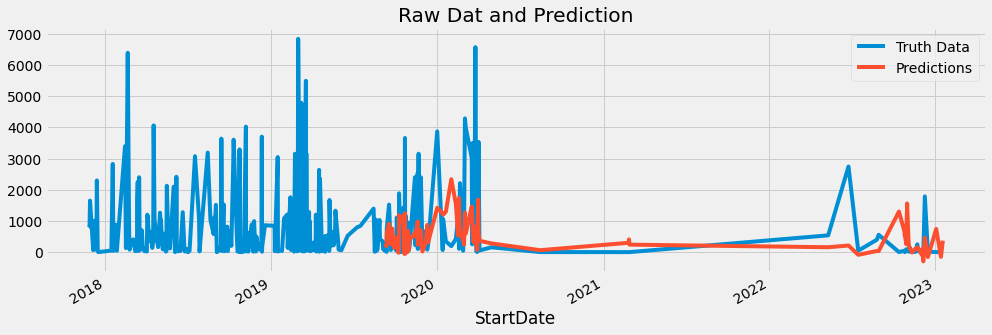

In [ ]:
test['prediction'] = reg.predict(X_test)
dfsort2 = dfsort2.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfsort2[['GroupSize']].plot(figsize=(15, 5))
test['prediction'].plot(legend=True)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()